<a href="https://colab.research.google.com/github/JuanBenavidesR/JBdBroker/blob/master/G3_Week2_MNIST_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST dataset**

En este ejercicio, aprenderemos a clasificar los dígitos del 0-9 usando una red neuronal multicapa.

La base de datos MNIST, puede importarse directamente a través de Keras. Esta importación arroja cuatro conjuntos de numpy arrays

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


El conjunto de entrenamiento está constituido por los arreglos train_images y train_labels, mientras que el conjunto de prueba se forma por los arreglos test_images y test_labels. 

Mediante el conjunto de entrenamiento, la red neuronal aprende a establecer la relación entre las imágenes y sus respectivas clases, por ejemplo, correlaciona el dígito 0 con la clase 0, el dígito 1 con la clase 1 y así sucesivamente.<br>
Por su parte, el conjunto de prueba es útil para evaluar si el aprendizaje que realizó la red neuronal durante la etapa de entrenamiento, es suficiente para clasificar correctamente nuevos dígitos, los cuales no se incluyeron en el conjunto de entrenamiento, de ahí que, como condición obligatoria para entrenar y evaluar correctamente una red neuronal, el conjunto de prueba nunca debe mezclarse con el conjunto de entrenamiento. 

In [ ]:
Echémosle un vistazo al conjunto de entrenamiento:

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
train_labels[59993]

5

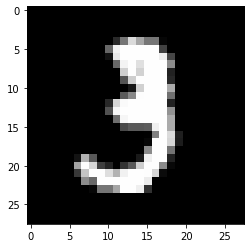

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[10], cmap='gray', vmin=0, vmax=255)
plt.show()

Ahora analicemos el conjunto de prueba:

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
test_labels[2]

1

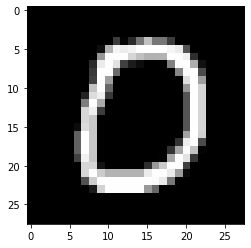

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_images[10], cmap='gray', vmin=0, vmax=255)
plt.show()

Definimos nuestra arquitectura:

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential() #network es el nombre de nuestro modelo, el cual es de tipo Sequential.

#Definimos la capa oculta, la cual se compone de 512 neuronas y recibe información de las neuronas de la capa de entrada, la cual tiene un total de 28*28 neuronas.
#Mediante el parámetro activation, podemos determinar la función de activación que se estará aplicando en cada una de las neuronas de la capa oculta.
network.add(layers.Dense(512, activation='relu', input_shape=[(28 * 28,)])) #Dense -> Densamente conectada

#Definimos la capa de salida, la cual se compone de 10 neuronas.
#Siempre que queremos abordar un problema de clasificación multiclase, se emplear la función softmax en la capa de salida.
network.add(layers.Dense(10, activation='softmax')) 

In [ ]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


A continuación, se muestra la representación gráfica de dos de las funciones de activación más conocidas dentro del marco de las redes neuronales.

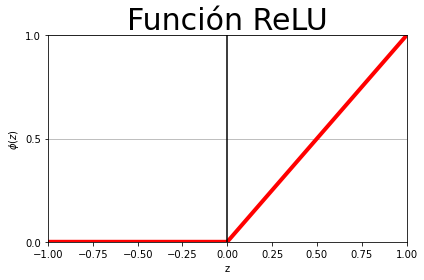

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def relu(z):
    return np.maximum(0, z)

z = np.arange(-1, 1.1, 0.1)
phi_z = relu(z)
plt.plot(z, phi_z, 'r', linewidth=4.0)
plt.title("Función ReLU", fontsize=30)
plt.axvline(0.0, color='k')
plt.xlim(-1.0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

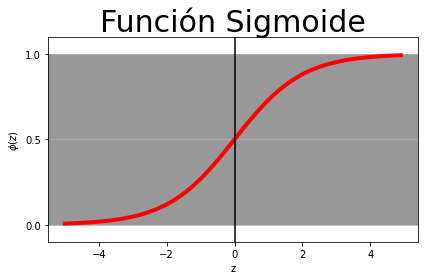

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-5, 5, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z, 'r', linewidth=4.0)
plt.title("Función Sigmoide", fontsize=30)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.axhspan(0, 1, facecolor='0.2', alpha=0.5)
#plt.savefig('images/03_02.png', dpi=300)
plt.show()

El siguiente paso, se conoce como compilación y consiste en definir los siguientes tres valores:<br>
1. Optimizador: Es la función que actualiza los pesos y está determinada por la función de pérdida.
2. Función de pérdida: Nos permite conocer el desempeño de la red neuronal durante el entrenamiento, y aporta la información necesaria para que los pesos de la red neuronal se ajusten en la dirección correcta. 
3. Métricas: Estas nos brindan la posibilidad de darle un seguimiento al rendimiento de la red neuronal.





In [ ]:
network.compile(optimizer='rmsprop', #Los optimizadores siempre son una variación del SGD.
              loss='categorical_crossentropy', #La función de pérdida categorical_crossentropy se usa siempre que estamos tratando un problema de clasificación multiclase. 
              metrics=['accuracy']) #La métrica accuracy nos permitirá conocer que tan exacto es el modelo neuronal al clasificar dígitos. Es importante
                                    #tener en cuenta que, sin importar el tipo de métricas, estas no tienen influencia en el entrenamiento.

Ahora, es necesario preprocesar nuestros datos. Previamente, nos dimos cuenta que el conjunto de entrenamiento está organizado en un arreglo con dimensiones (60000, 28, 28), sin embargo, la red neuronal es incapaz de recibir datos con esas dimensiones, por la tanto, procedemos a redimensionar el conjunto de entrenamiento, de tal manera que al final nos quede un arreglo con dimensiones (60000, 28*28). Por otro lado, también procedemos a normalizar los elementos de cada instancia, los cuales tienen valores en el rango 0-255. La normalización se realiza en el intervalo [0, 255]. Finalmente, también es importante llevar a cabo la conversión de enteros a flotantes de cada una de las instancias.

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Como apunte adicional, al estar trabajando en Tensorflow/Keras, el término *arreglo* se deja de lado para en su lugar utilizar el término *tensor*, el cual es, básicamente, una generalización de las matrices.

En lo que a las etiquetas se refiere, una práctica de uso extendido consiste en aplicar un mecanismo llamado **"one-hot encoding"**, que tiene la función de generar un vector de ceros con un número de dimensiones igual al del número de clases, y coloca un 1 en el índice representado por la clase. Así, al final del proceso de one-hot encoding, se construye un vector binario.<br>

In [ ]:
train_labels[567]

7

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_labels[567]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

En este punto, ya estamos listos para entrenar nuestro modelo:

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.4350 - accuracy: 0.8735
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1125 - accuracy: 0.9654
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0680 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0477 - accuracy: 0.9860
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0349 - accuracy: 0.9898


Dentro de la función *fit(),* un parámetro que llama la atención es el de *batch_size.* Para entender cómo funciona, primero tenemos que comprender que, por cada época, los datos que constituyen el conjunto de entrenamiento se divide en múltiples lotes, donde cada lote contiene la misma cantidad de datos. Durante el entrenamiento, y por cada época, la red neuronal es alimentada por todos los lotes en los que se distribuyen los datos. Esta división del conjunto de entrenamiento en varios lotes, se realiza principalmente para optimizar el proceso de actualización de los pesos y evitar cargar en memoria una cantidad excesiva de información durante cada época.<br>
Considerando lo anterior, el valor del parámetro *batch_size* indica el número de datos que contendrá cada lote. 

Una vez que el modelo ha sido entrenado, es tiempo de evaluar su desempeño en el conjunto de prueba.

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0721 - accuracy: 0.9805


In [ ]:
print('test_acc:', test_acc)
print('test_loss:', test_loss)

test_acc: 0.9804999828338623
test_loss: 0.07206108421087265


In [ ]:
#Predecimos la clase de todos los dígitos del conjunto de prueba
predictions = network.predict(test_images)

In [ ]:
#Para un análisis más sutil, revisamos la predicción realizada sobre un dígito en particular
predictions[0]

In [ ]:
#Siendo aún más específicos, podemos obtener la clase que fue predecida para el dígito en cuestión
np.argmax(predictions[0])

7

In [ ]:
#Para corroborar la precisión de la predicción, podemos comparar el resultado obtenido con el resultado esperado.
np.argmax(test_labels[0])

7